In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)

In [12]:
train_df = pd.read_csv('D:/숙탯 2기/2022-여름-캐글/9565_hospital_data/train.csv')
test_df = pd.read_csv('D:/숙탯 2기/2022-여름-캐글/9565_hospital_data/test.csv')

In [13]:
# # 변수 형 변환

# train_df.openDate = pd.to_datetime(train_df.openDate.astype(str), format='%Y%m%d')
# test_df.openDate = pd.to_datetime(test_df.openDate.astype(str), format='%Y%m%d')

# test_df.employee1 = test_df.employee1.str.replace(',', '')
# test_df.employee1 = pd.to_numeric(test_df.employee1, errors='ignore')

# test_df.employee2 = test_df.employee2.str.replace(',', '')
# test_df.employee2 = pd.to_numeric(test_df.employee2, errors='ignore')

# cat = ['OC', 'sido', 'sgg', 'instkind', 'ownerChange']

# for column in cat:
#     train_df[column] = train_df[column].astype('category')
#     test_df[column] = test_df[column].astype('category')

# 1. Outlier Detection

In [15]:
numeric = train_df.select_dtypes(exclude = ['category', 'datetime64[ns]']).columns
numeric

Index(['inst_id', 'bedCount', 'revenue1', 'salescost1', 'sga1', 'salary1',
       'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1',
       'quickAsset1', 'receivableS1', 'inventoryAsset1', 'nonCAsset1',
       'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2'],
      dtype='object')

### 1.1 원 자료의 boxplot

+ boxplot에서는 정규분포를 가정하고 이상치를 분류하므로 로그 변환하여 정규성을 높인 뒤 이상치 확인

**1.1.1 train_data**

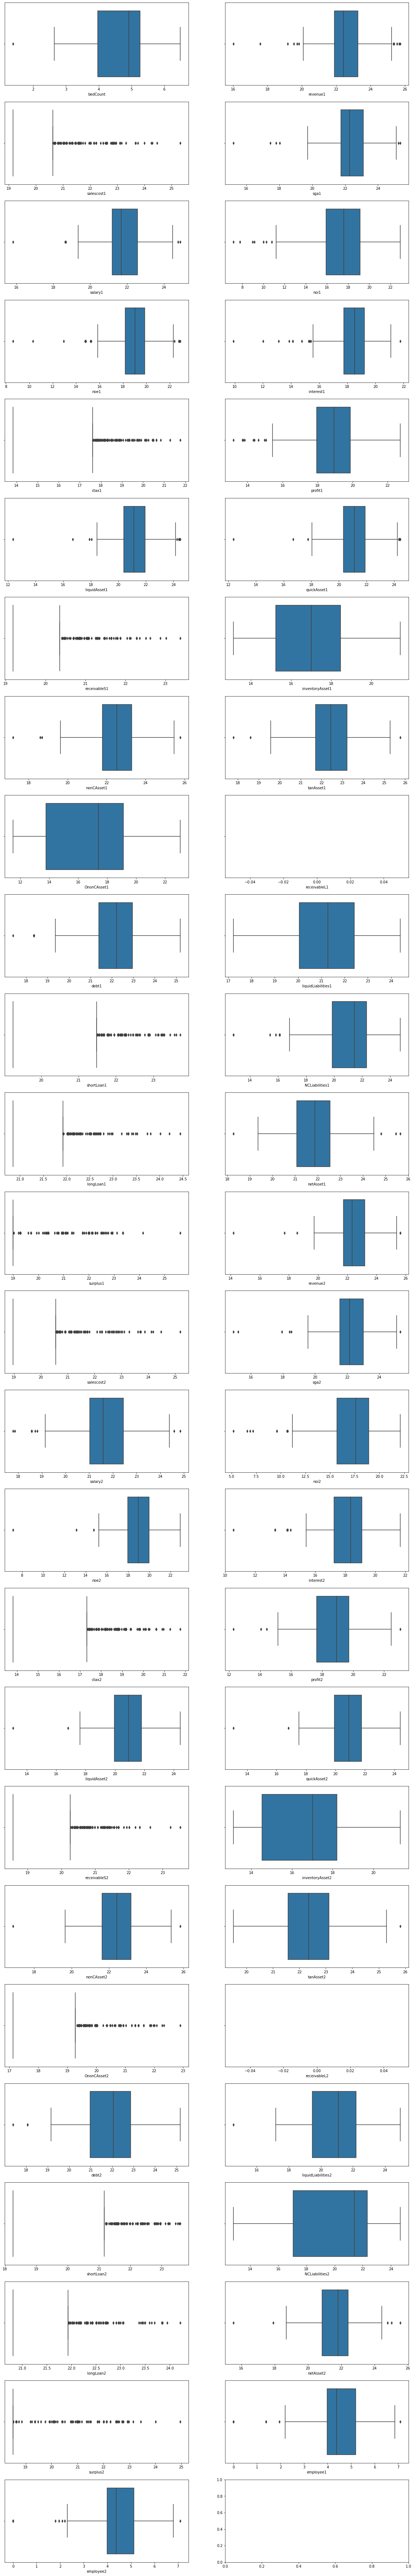

In [16]:
col_n = 2
row_n = 26

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(numeric[1:]):
    sns.boxplot(data=np.log(train_df.loc[:, numeric]), x=col, ax=ax[int(i/col_n),int(i%col_n)])

**1.1.2 test data**

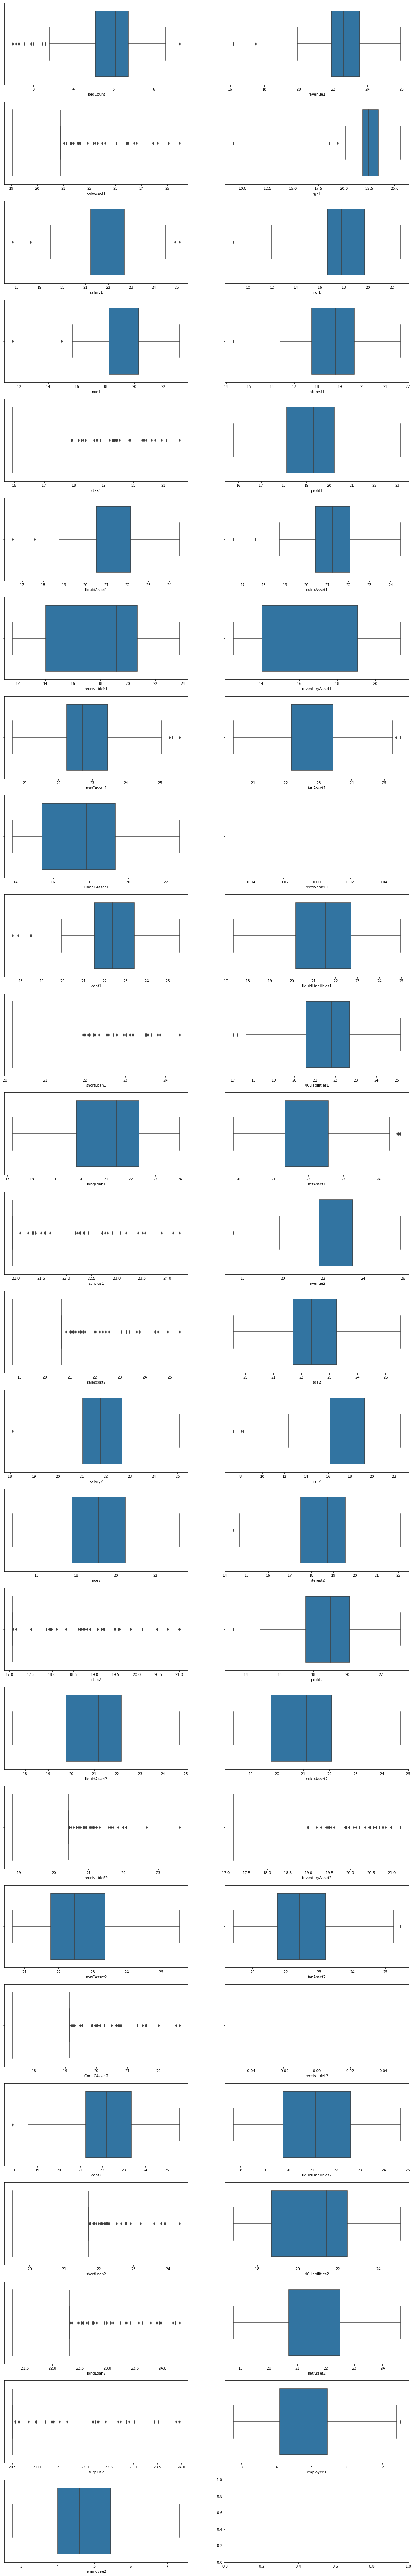

In [17]:
col_n = 2
row_n = 26

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(numeric[1:]):
    sns.boxplot(data=np.log(test_df.loc[:, numeric]), x=col, ax=ax[int(i/col_n),int(i%col_n)])

### 1.2 결측치 처리 & 오버샘플링 후 Boxplot

# 2. Correlation

In [26]:
train_corr = train_df.drop(columns=['OC']).corr()
s = train_corr.unstack()
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df = df[df['corr'].abs() >= 0.4]
df = df.drop_duplicates()
df.style.background_gradient(cmap='viridis')

,,corr
quickAsset1,liquidAsset1,0.999603
quickAsset2,liquidAsset2,0.999389
salescost1,salescost2,0.994907
revenue1,revenue2,0.987402
tanAsset2,nonCAsset2,0.985946
tanAsset1,nonCAsset1,0.983556
salary2,salary1,0.979092
sga1,sga2,0.977083
inventoryAsset1,inventoryAsset2,0.974494
employee1,employee2,0.973681


# 3. Distribution

- Imputation 및 오버샘플링 완료한 데이터.

### 3.2 상관관계가 매우 높은 feature 간의 label 비율 비교